Using Recursive Feature Elimination

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
df["mainroad"] = df["mainroad"].map({"yes":1, "no": 0})
df["guestroom"] = df["guestroom"].map({"yes":1, "no": 0})
df["basement"] = df["basement"].map({"yes":1, "no": 0})
df["hotwaterheating"] = df["hotwaterheating"].map({"yes":1, "no": 0})
df["airconditioning"] = df["airconditioning"].map({"yes":1, "no": 0})
df["prefarea"] = df["prefarea"].map({"yes":1, "no": 0})

In [5]:
status = pd.get_dummies(df["furnishingstatus"], drop_first=True)
df = pd.concat([df, status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [6]:
df.drop(["furnishingstatus"], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [7]:
df["areaperbedroom"] = df["area"]/df["bedrooms"]
df["bbratio"] = df["bathrooms"]/df["bedrooms"]
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [8]:
def normalize(x):
    return ((x-np.min(x))/(max(x) - min(x)))
df = df.apply(normalize)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [9]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished', 'areaperbedroom', 'bbratio']]
y = df["price"]

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
rfe = RFE(model, 9)
rfe = rfe.fit(Xtrain, ytrain)
print(rfe.support_, "\n", rfe.ranking_)

[ True False  True  True  True False False  True  True False  True False
 False  True  True] 
 [1 3 1 1 1 4 6 1 1 2 1 7 5 1 1]


In [13]:
col = Xtrain.columns[rfe.support_]

In [14]:
Xtrainrfe = Xtrain[col]
import statsmodels.api as sm
Xtrainrfe = sm.add_constant(Xtrainrfe)
model = sm.OLS(ytrain, Xtrainrfe).fit()

C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     80.14
Date:                Fri, 31 May 2019   Prob (F-statistic):           1.88e-81
Time:                        19:55:36   Log-Likelihood:                 369.54
No. Observations:                 381   AIC:                            -719.1
Df Residuals:                     371   BIC:                            -679.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0139      0.021      0.654      0.513      -0.028       0.055
area                0.7022      0.130      5.421      0.000       0.447       0.957
bathrooms           0.1718      0.098      1.759      0.079      -0.020       0.364
stories             0.0814      0.019      4.321      0.000       0.044       0.118
mainroad            0.0647      0.014      4.470      0.000       0.036       0.093
hotwaterheating     0.1002      0.022      4.523      0.000       0.057       0.144
airconditioning     0.0776      0.011      6.806      0.000       0.055       0.100
prefarea            0.0631      0.012      5.286      0.000       0.040       0.087
areaperbedroom     -0.4095      0.143     -2.868      0.004      -0.690      -0.129
bbratio             0.1156      0.080      1.450      0.148      -0.041       0.272
==============================================================================
Omnibus:                       85.512   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.429
Skew:                           0.998   Prob(JB):                     4.22e-60
Kurtosis:                       6.638   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
X_test = sm.add_constant(Xtest)
X_test = X_test.drop(["area", "semi-furnished", "bedrooms", "areaperbedroom", "stories", "basement"], axis = 1)
ypred = model.predict(X_test)

C:\Python\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0,0.5,'Housing Price')

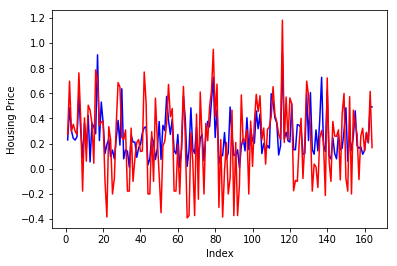

In [17]:
c = [i for i in range(1, 165, 1)]
fig = plt.figure()
plt.plot(c, ytest, color = "blue", linestyle = "-")
plt.plot(c, ypred, color = "red", linestyle = "-")
plt.xlabel("Index")
plt.ylabel("Housing Price")

Text(0,0.5,'Error')

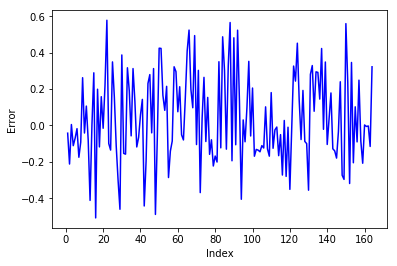

In [18]:
fig = plt.figure()
plt.plot(c, ytest-ypred, color = "blue", linestyle = "-")
plt.xlabel("Index")
plt.ylabel("Error")

Text(0,0.5,'Error')

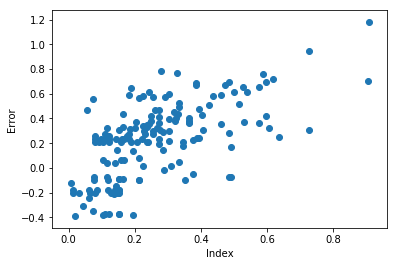

In [19]:
fig = plt.figure()
plt.scatter(ytest,ypred)
plt.xlabel("Index")
plt.ylabel("Error")

C:\Python\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Error')

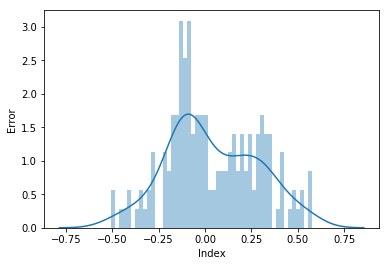

In [20]:
fig = plt.figure()
sns.distplot((ytest-ypred), bins = 50)
plt.xlabel("Index")
plt.ylabel("Error")

In [21]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(ytest, ypred))

0.24371416145107896